## SAP SIGNAVIO Test Assignment

From the BPMN based process models, find the identifier, count, and relative amount (%) of process models with:
- No start event
- Several start events
- With no end event
- With several end events
- With no start event, but with one or several tasks that can be considered to be the first activity in the process model

In [242]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import json
import os
import seaborn as sns

os.chdir('D:/WORK germany/SAP Signavio/sap-sam-main/src') 
from sapsam import parser, constants

First, the CSV files are imported and parsed. To parse and filter only the BPMN models, the method _parse_bpmn_model_elements_csv from BpmnModelParser class is used. It includes the namespace check for modeling notation.

In [142]:
csv_paths = parser.get_csv_paths()
df = pd.DataFrame()
for csv_path in csv_paths:
    print(csv_path.name)
    p = parser.BpmnModelParser(parse_outgoing=True) 
    df_bpmn = p._parse_bpmn_model_elements_csv(csv_path)
    df = pd.concat([df, df_bpmn])

1000000.csv
1010000.csv
1020000.csv
880000.csv
890000.csv
900000.csv
910000.csv
920000.csv
930000.csv
940000.csv
950000.csv
960000.csv
970000.csv
980000.csv
990000.csv


We group by model_id, that each line shows how many times each type of activity is represented in process model.

In [155]:
# grouping by model_id
df_cnts = (
    df.groupby("model_id").category
    .value_counts()
    .to_frame("count")
    .unstack()
    .droplevel(0, axis='columns') # drop first level column level "count" that unstack produces
    .fillna(0, downcast="infer")
)

df_cnts

Index(['Association_Bidirectional', 'Association_Undirected',
       'Association_Unidirectional', 'ChoreographyParticipant',
       'ChoreographyTask', 'CollapsedEventSubprocess', 'CollapsedPool',
       'CollapsedSubprocess', 'CollapsedVerticalPool', 'Communication',
       'ComplexGateway', 'ConversationLink', 'DataObject', 'DataStore',
       'EndCancelEvent', 'EndCompensationEvent', 'EndErrorEvent',
       'EndEscalationEvent', 'EndMessageEvent', 'EndMultipleEvent',
       'EndNoneEvent', 'EndSignalEvent', 'EndTerminateEvent',
       'EventSubprocess', 'EventbasedGateway', 'Exclusive_Databased_Gateway',
       'Group', 'ITSystem', 'InclusiveGateway', 'IntermediateCancelEvent',
       'IntermediateCompensationEventCatching',
       'IntermediateCompensationEventThrowing', 'IntermediateConditionalEvent',
       'IntermediateErrorEvent', 'IntermediateEscalationEvent',
       'IntermediateEscalationEventThrowing', 'IntermediateEvent',
       'IntermediateLinkEventCatching', 'Intermedi

# No start event
To calculate how many models have no start event, we examine each model (i.e., each row in df_cnts) for the presence of any of the start event types in it. Since we have the number of each item in the process model, for no start event, each of the columns representing the start event must have a value of zero.

In [224]:
# calculate the sum of the events for each row
event_cols = ['StartCompensationEvent', 'StartConditionalEvent', 'StartErrorEvent', 'StartEscalationEvent', 'StartMessageEvent', 'StartMultipleEvent', 'StartNoneEvent', 'StartParallelMultipleEvent', 'StartSignalEvent', 'StartTimerEvent']
event_sum = df_cnts[event_cols].sum(axis=1)

# create a boolean mask to filter the rows where the sum of events is greater than 1
mask_noStart = event_sum == 0

# count the number of rows that meet the mask condition i.e have no start event 
count = mask_noStart.sum()
noStart = df_cnts[mask_noStart]

# relative amount of models with no start event 
pct_noStart = round(noStart.shape[0] / df_cnts.shape[0], 2)
noStart = noStart.reset_index()
print("Amount of models without the start event: ", count)
print("Relative anouunt of models without the start event: ", "{:.0%}".format(pct_noStart))
print("List of model IDs without the start event:")
display(pd.DataFrame(noStart["model_id"]))



Amount of models without the start event:  2339
Relative anouunt of models without the start event:  3%
List of model IDs without the start event:


,model_id
0,0a27136a84fa486a8f37dc6032273809
1,0a285138d5ce4006b891b7ab7babc31d
2,0a2acac596934f16bb949b45953401cd
3,0a2ce9e4ae6045d995a2d0fa32bb942d
4,0a3459e81fcb47afa0b70cf5b12b53df
...,...
2334,ff905a778d5c4ce2baba0af08f5d9805
2335,ff98a2ca48f44daab2bf8f840137803c
2336,ff9fd2f53c2b4a2ba0f0f51114c51f93
2337,ffa2cafedc7044d28264dd9a877a9da8


# Several start events

To calculate how many models have several start events, we examine each model (i.e., each row in df_cnts) for the presence of any of the start event types in it. Since we have the number of each item in the process model, for several start events, at least two of the columns representing the start event must have a value more than 0.

In [227]:
mask_startMulti = event_sum > 1

# count the number of rows that meet the mask condition
count_startMulti = mask_startMulti.sum()
multiStart = df_cnts[mask_startMulti]
pct_startMulti = round(multiStart.shape[0] / df_cnts.shape[0], 2)
print("Amount of models with multiple start events: ", count_startMulti)
print("Relative amount of modelswith multiple start events: ","{:.0%}".format(pct_startMulti))
print("List of model IDs with multiple start events:")
multiStart = multiStart.reset_index()
display(pd.DataFrame(multiStart["model_id"]))



Amount of models with multiple start events:  13754
Relative amount of modelswith multiple start events:  16%
List of model IDs with multiple start events:


,model_id
0,0a2033822ffa4f6da9bf075f115b387c
1,0a211d3d472c4d32ab1c533c792a209a
2,0a22137326cc478bae323f65e14a2f0b
3,0a221956fa184b0193b2a5a9bfa2bf96
4,0a22672438e74a42a3b796246641ceb8
...,...
13749,ffa2316d5dd643bbb938507c0ffb7ef2
13750,ffa31aaf5b8b4a26815d9165864ad4ce
13751,ffa4d79868fb417c9de075ff5f34c45c
13752,ffa569f31b0546fc9cfc19b2a0b0a203


# No end event
To calculate how many models have no end event, we examine each model (i.e., each row in df_cnts) for the presence of any of the end event types in it. Since we have the number of each activity in the process model, for no end event, each of the columns representing the end event must have a value of zero.

In [228]:
#Names of the colomns, which represent end events 
end_event_cols = ['EndCancelEvent', 'EndCompensationEvent', 'EndErrorEvent', 'EndEscalationEvent', 'EndMessageEvent', 'EndMultipleEvent', 'EndNoneEvent', 'EndSignalEvent', 'EndTerminateEvent']
# calculate the sum of the end events for each row
event_sum_end = df_cnts[end_event_cols].sum(axis=1)

# create a boolean mask to filter the rows where the sum of events is greater than 1
mask_noEnd = event_sum_end == 0

# count the number of rows that meet the mask condition e.g. multiple start events
count_noEnd = mask_noEnd.sum()
noEnd = df_cnts[mask_noEnd]
#count the relative amount of the models with no end event
pct_noEnd = round(noEnd.shape[0] / df_cnts.shape[0], 2)

print("Amount of models without the end event: ",(count_noEnd))
print("Relative anouunt of models without the end event: ","{:.0%}".format(pct_noEnd))
print("List of model IDs without the end event:")
noEnd = noEnd.reset_index()
display(pd.DataFrame(noEnd["model_id"]))


Amount of models without the end event:  3890
Relative anouunt of models without the end event:  5%
List of model IDs without the end event:


,model_id
0,0a1ef88d340b4d6d9d5faec06083ca60
1,0a1f112af2a7492daffec5bb0e96be40
2,0a1f6515f7cb4da98ff9534b5340bb7e
3,0a230773d7a0420bbac6dc1071f94ddb
4,0a24f1b8738f4ec38ad05fc8a6b67a80
...,...
3885,ff972c2c9db84881b46f094d822abc15
3886,ff98a2ca48f44daab2bf8f840137803c
3887,ff9fc4b385b8497a96e8b811fb487098
3888,ff9fd2f53c2b4a2ba0f0f51114c51f93


# Several end event
To calculate how many models have no end event, we examine each model (i.e., each row in df_cnts) for the presence of any of the end event types in it. Since we have the number of each activity in the process model, for several end events, at least two columns representing the end event must have a value more than zero (or one colomn, which represents end event type must have a value more than two).

In [229]:
# create a boolean mask to filter the rows where the sum of events is greater than 1
mask_multiEnd = event_sum_end > 1

# count the number of rows that meet the mask condition
count_multiEnd = mask_multiEnd.sum()
multiEnd = df_cnts[mask_multiEnd]

# relative amount of the process models with several end events
pct_multiEnd = round(multiEnd.shape[0] / df_cnts.shape[0], 2)

print("Amount of models with multiple end events: ",count_multiEnd)
print("Relative anouunt of models with multiple end event: ", "{:.0%}".format(pct_multiEnd))
print("List of model IDs with multiple end event:")
multiEnd = multiEnd.reset_index()
display(pd.DataFrame(multiEnd["model_id"]))

Amount of models with multiple end events:  51062
Relative anouunt of models with multiple end event:  61%
List of model IDs with multiple end event:


,model_id
0,0a1fb922e8f24db8ad264b70160a4101
1,0a20539818604b53bf8bbf9a7ca6d9fb
2,0a209450944141a79a5e7b190e7f2f84
3,0a20b8900b0749448b26a01e86b088eb
4,0a20d2d61d5648b9bb2d3b8f5ff17970
...,...
51057,ffa4673ef9c049589c719e4e22c31212
51058,ffa4af6ba3f4445d9e0bc6b3f5615dbe
51059,ffa4e3ab6bbe4948a1340965b66ac9a5
51060,ffa54d59d7694ed2a8043e4cfed4be36


In [230]:
#for further visualisation

#add to the dataframe for further visualisation

#fill dataframe with above calculated values
visual_df = pd.DataFrame(columns=['type','category', 'pct'])
newRow = {"type": "start","category": "No start event", "pct": pct_noStart}
visual_df.loc[len(visual_df)] = newRow

newRow = {"type": "start","category": "Several start events", "pct": pct_startMulti}
visual_df.loc[len(visual_df)] = newRow

newRow = {"type": "end","category": "No end event", "pct": pct_noEnd}
visual_df.loc[len(visual_df)] = newRow

newRow = {"type": "end","category": "Several end events", "pct": pct_multiEnd}
visual_df.loc[len(visual_df)] = newRow

#calculate the % of models with one start event 
mask_startOne = event_sum == 1
startOne = df_cnts[mask_startOne]
pct_startOne = round(startOne.shape[0] / df_cnts.shape[0], 2)
newRow = {"type": "start","category": "One start events", "pct": pct_startOne}
visual_df.loc[len(visual_df)] = newRow

#calculate the % of models with one end event 
mask_oneEnd = event_sum_end == 1
oneEnd = df_cnts[mask_oneEnd]
pct_endOne = round(oneEnd.shape[0] / df_cnts.shape[0], 2)
newRow = {"type": "end","category": "One end event", "pct": pct_endOne}
visual_df.loc[len(visual_df)] = newRow



# With no start event, but with one or several tasks that can be considered to be the first activity in the process model

In [153]:
# filtered dataframe,which consists only of BPMMs, which does not have a start event 
df_noStart = df.loc[noStart["model_id"]]


To find models, where the task can be considered as a start activity, the algorithm is following:
Task can be considered as start activity only if it does not have any incoming flow. To check that we perform the next steps
1. For each model we iterate through each model element to collect ougoing IDs of SequenceFlow.  
2. We iterate again thhrough the Task and check if the task ID in outgoing_ids set. If yes, than there is a sequence flow pointing on that, than task is in the middle of the process. If task ID id not in the outgoing_id, then nothing is pointing on that and it is a start task
3. If models with a task/tasks as a start activity are found we add then to a dataframe to calculate the amount and relative amount of such models

In [184]:
task_asStart_df = pd.DataFrame(columns=["Model ID"])

for model_id, group1 in df_noStart.groupby(level=0):
    outgoing_ids = set()
    for element_id, group2 in group1.groupby(level=1):
        # check if the category is "Sequence flow"
        if group2["category"].item() == "SequenceFlow":
            # extend the set with the outgoing ids for sequence flow elements
            outgoing_ids.update(group2["outgoing"].explode().tolist())
    for element_id, group2 in group1.groupby(level=1):
        if group2["category"].item() == "Task":
            if element_id not in outgoing_ids:
                new_row = {"Model ID": model_id}
                task_asStart_df = pd.concat([task_asStart_df, pd.DataFrame([new_row])], ignore_index=True)

counts = task_asStart_df["Model ID"].value_counts()
df_counts = counts.reset_index()
df_counts.columns = ["Model ID", "Count"]
task_asStart_df = task_asStart_df.join(df_counts.set_index("Model ID"), on="Model ID")

pct_task_asStart = round(new_df.shape[0] / df_cnts.shape[0], 2)
pct_task_asStart = "{:.0%}".format(pct_task_asStart)
print("Relative amount of models, which have one or multiple tasks as a start activity:", pct_task_asStart)
print("Amount of models, which have one or multiple tasks as a start activity:", task_asStart_df.shape[0])


Relative amount of models, which have one or multiple tasks as a start activity: 5%
Amount of models, which have one or multiple tasks as a start activity: 4254


We iterate through earch model and element ID, to check if outgoing from sequence flow is a task. If not, task if the first one

In [249]:
print(visual_df)

    type              category   pct
0  start        No start event  0.03
1  start  Several start events  0.16
2    end          No end event  0.05
3    end    Several end events  0.61
4  start      One start events  0.81
5    end         One end event  0.34


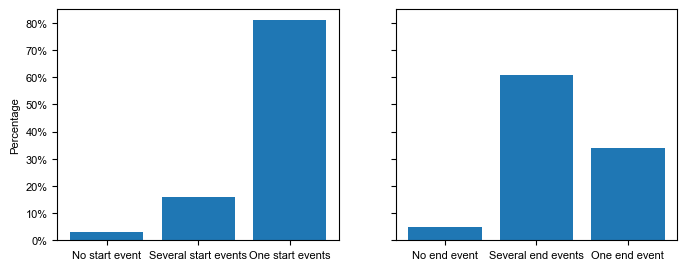

In [248]:
# Create two subplots for each type
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3), sharey=True)
plt.rcParams.update({'font.size': 8})

start_df = visual_df[visual_df['type'] == 'start']
ax1.bar(start_df['category'], start_df['pct'])
plt.xticks(fontsize=8)
ax1.set_ylabel('Percentage')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Plot for 'end' type
end_df = visual_df[visual_df['type'] == 'end']
ax2.bar(end_df['category'], end_df['pct'])
plt.xticks(fontsize=8)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))


# Show the plot
plt.show()